In [2]:
import torch
import ClassFiles.Networks as net
import ClassFiles.GeneratedDataset as dat
import ClassFiles.Training as train
import ClassFiles.DeepSegmentation as rec
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

clean_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "clean")
dirty_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "dirty")
cv_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "chan-vese")
cv_seg_dataset = dat.SegmentationDataset("./Neural_Networks_lunglike/eval", "chan-vese")
clean_seg_dataset = dat.SegmentationDataset("./Neural_Networks_lunglike/eval", "clean")


NN = net.ConvNet8(1, 128, 128)
NN.load_state_dict(torch.load("./Neural_Networks_lunglike/ConvNet8_trained", map_location = torch.device("cpu")))

for i in range(1):
    image_number = 82
    
    clean_im = Image.fromarray(
        255 * clean_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    dirty_im = Image.fromarray(
        255 * dirty_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    cv_im = Image.fromarray(
        255 * cv_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    cv_seg = cv_seg_dataset.__getitem__(image_number)
    clean_seg = clean_seg_dataset.__getitem__(image_number)

    reconstruction = rec.DeepSegmentation(clean_im, NN, cv_seg)
    plt.close()
    reconstruction.save_segmentation(f'{image_number:03}'+'_cv', path = ".")
    plt.close()


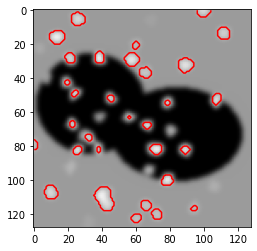

In [7]:
import torch
import ClassFiles.Networks as net
import ClassFiles.GeneratedDataset as dat
import ClassFiles.Training as train
import ClassFiles.DeepSegmentation as rec
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

clean_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "clean")
dirty_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "dirty")
cv_image_dataset = dat.ImageDataset("./Neural_Networks_lunglike/eval", "chan-vese")
cv_seg_dataset = dat.SegmentationDataset("./Neural_Networks_lunglike/eval", "chan-vese")
clean_seg_dataset = dat.SegmentationDataset("./Neural_Networks_lunglike/eval", "clean")


NN = net.ConvNet8(1, 128, 128)
NN.load_state_dict(torch.load("./Neural_Networks_lunglike/ConvNet8_trained", map_location = torch.device("cpu")))

for i in range(1):
    image_number = 82
    
    clean_im = Image.fromarray(
        255 * clean_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    dirty_im = Image.fromarray(
        255 * dirty_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    cv_im = Image.fromarray(
        255 * cv_image_dataset.__getitem__(image_number)[0].numpy()
    ).convert("L")
    cv_seg = cv_seg_dataset.__getitem__(image_number)
    clean_seg = clean_seg_dataset.__getitem__(image_number)
    dirty_seg = dirty_image_dataset.__getitem__(image_number)[0].numpy()

    reconstruction = rec.DeepSegmentation(dirty_im, NN, dirty_seg, segmentation_threshold = 0.7)
    reconstruction.show_segmentation()
    plt.close()



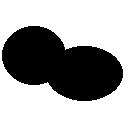

In [8]:
clean_im

In [9]:
clean_seg

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])